In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
%pip install ipython-sql
# Load the SQL extension
%load_ext sql

# Connect to an in-memory SQLite database
%sql sqlite://

# Create a table and insert your DataFrame into the table
%sql DROP TABLE IF EXISTS players;
%sql PERSIST df;  -- PERSIST allows you to create a table from a DataFrame




Note: you may need to restart the kernel to use updated packages.


 * sqlite://
Done.
 * sqlite://
(sqlite3.OperationalError) near "PERSIST": syntax error
[SQL: PERSIST df;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [3]:
# Replace 'your_file.csv' with the actual file path
file_path = 'SalaryPrediction.csv'

# Read CSV file into a DataFrame
data = pd.read_csv(file_path)


In [4]:
data.shape

(3907, 8)

In [5]:
data.columns

Index(['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


In [7]:
data.describe()

,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [8]:
data.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [9]:
data['Club'].unique()

array(['PSG', 'R. Madrid', 'Man UFC', 'Inter', 'Liverpool', 'Chelsea',
       'Man City', 'A. Madrid', 'FC Bayern', 'Barcelona', 'Tottenham',
       'Juventus', 'Nottm Forest', 'A. Bilbao', 'Borussia Dortmund',
       'Capitoline', 'Arsenal', 'RB Leipzig', 'Newcastle', 'Leicester',
       'Sporting CP', 'Everton', 'West Ham', 'Crystal Palace',
       'AS Monaco', 'Aston Villa', 'OGC Nice', 'Lazio', 'Milan', 'LOSC',
       'Bayer 04', 'Parthenope', 'Wolves', 'Sevilla', 'Real Hispalis',
       'Bournemouth', 'Southampton', 'OL', 'Villarreal', 'OM', 'Leeds',
       'Sampdoria', 'Fiorentina', 'Sassuolo', 'Benfica', 'Fulham',
       'Salento', 'Real San Sebastian', 'Salernitana', 'Brighton',
       'Hertha Berlin', 'Valencia', "Borussia M'gladbach", 'Torino',
       'Spezia', 'Getafe', 'Mallorca', 'VfL Wolfsburg', 'Hoffenheim',
       'SV Werder', 'Bologna', 'Brianza', 'Atalanta', 'Strasbourg',
       'Girona', 'Eintracht Frankfurt', 'Vallecano', '1. FC Koln',
       'Verona', 'Rennes', 'Vi

In [10]:
data['Position'].unique()

array(['Forward', 'Midfilder', 'Goalkeeper', 'Defender'], dtype=object)

In [11]:
data['League'].unique()

array(['Ligue 1 Uber Eats', 'La Liga', 'Premier League', 'Serie A',
       'Bundesliga', 'Primiera Liga'], dtype=object)

In [12]:
data['Wage'] = pd.to_numeric(data['Wage'].replace('[,]', '', regex=True), errors='coerce')

data['Wage'] = data['Wage'].astype(int)

In [13]:
figure1 = px.scatter(data, x='Age', y='Wage', color='Age', title='Wage based on age')
figure1.show()

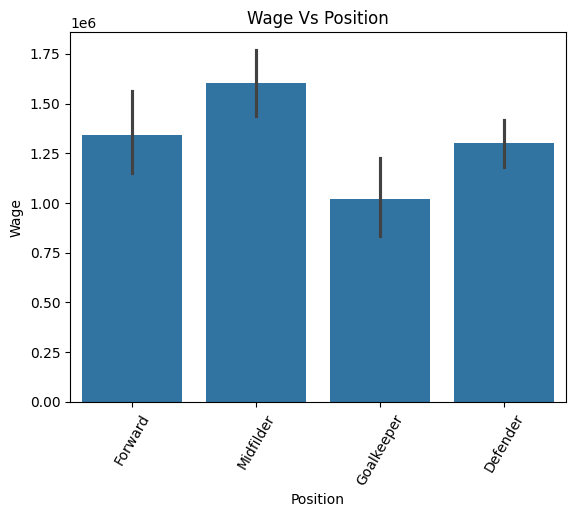

In [14]:
sns.barplot(data, x="Position", y="Wage", dodge = '2')
plt.title('Wage Vs Position')
plt.xticks(rotation=60)
plt.show()

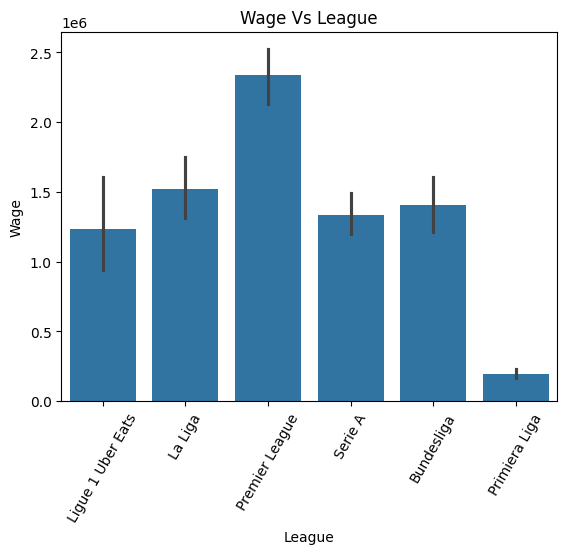

In [15]:
sns.barplot(data, x="League", y="Wage", dodge = '2')
plt.title('Wage Vs League')
plt.xticks(rotation=60)
plt.show()

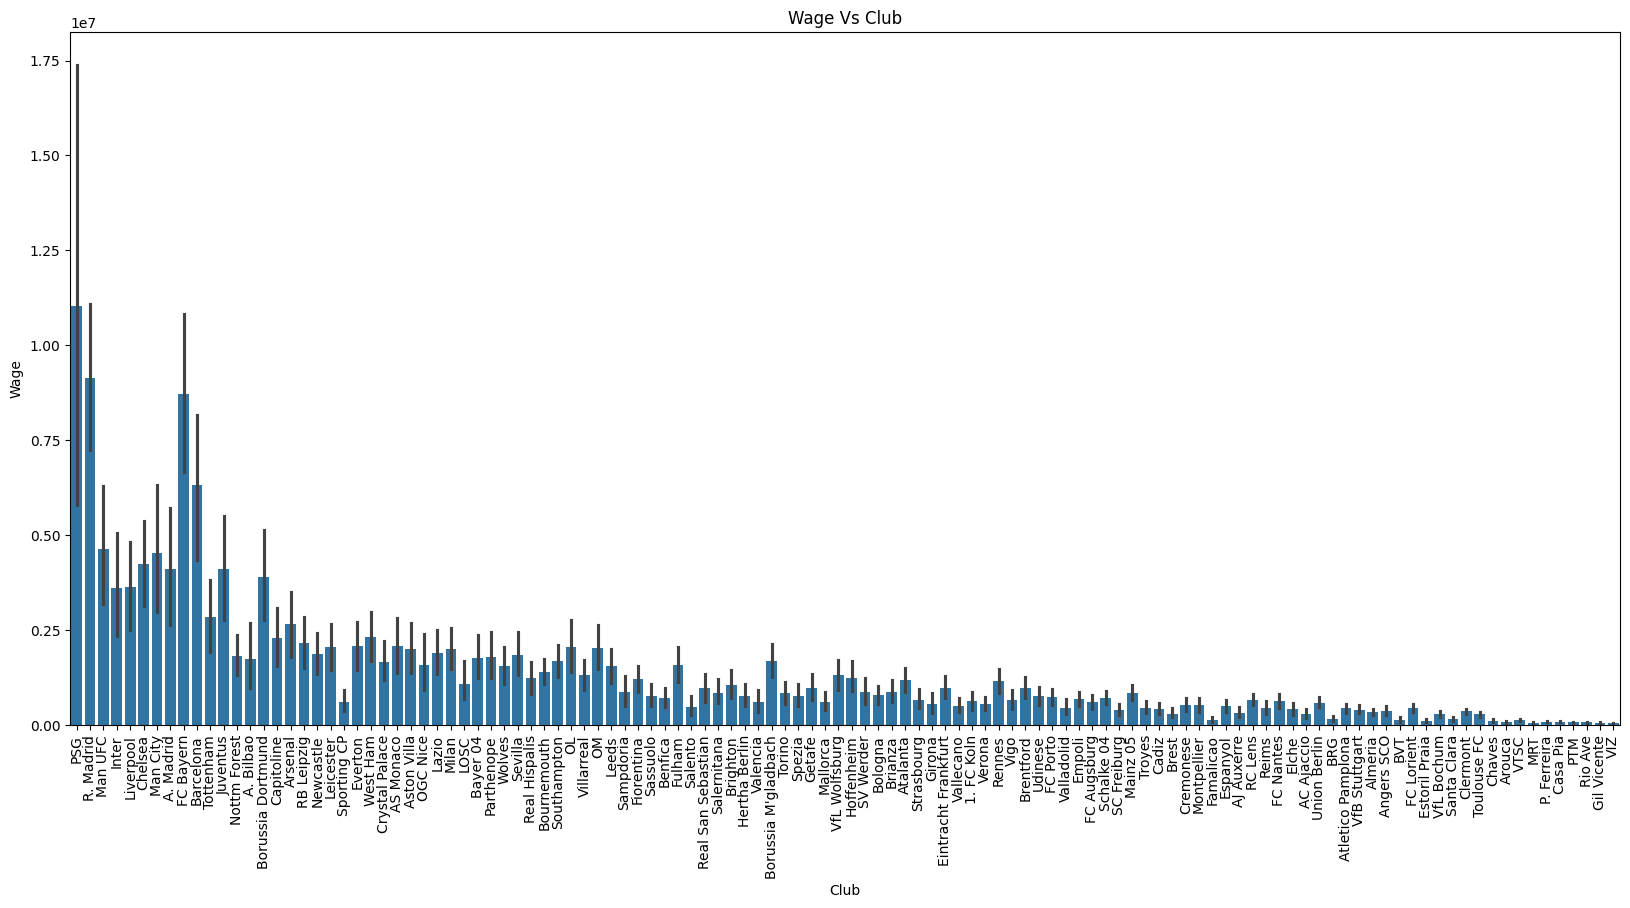

In [16]:
plt.figure(figsize=(20, 9))
sns.barplot(data, x="Club", y="Wage", dodge = '2')
plt.title('Wage Vs Club')
plt.xticks(rotation=90)
plt.show()

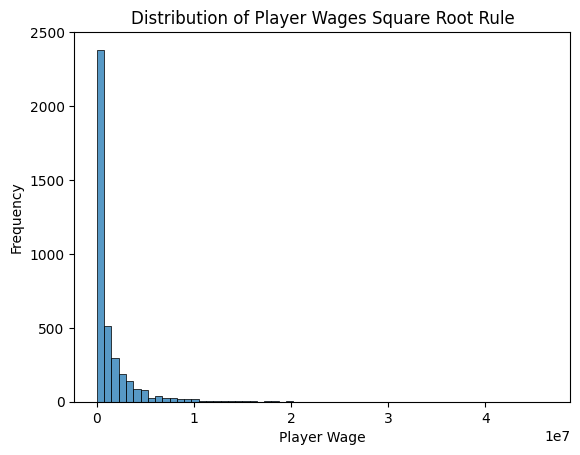

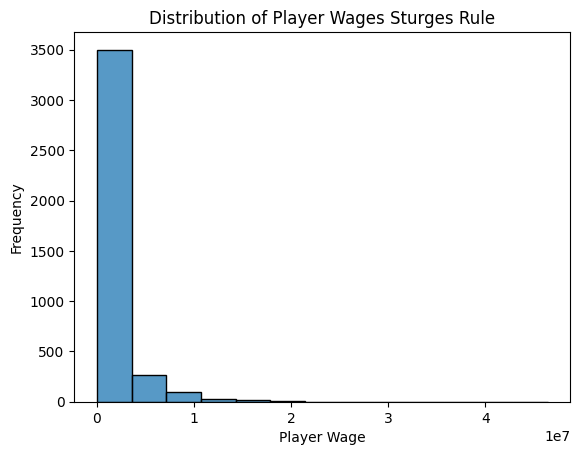

In [17]:
#Square Root Rule:
num_bins = int(np.sqrt(len(data['Wage'])))
sns.histplot(data['Wage'], bins = num_bins , kde=False)  # Adjust the number of bins as needed
plt.xlabel('Player Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Player Wages Square Root Rule')
plt.show()

#Sturges' Rule:
num_bins = int(np.ceil(1 + np.log2(len(data['Wage']))))
sns.histplot(data['Wage'], bins = num_bins , kde=False)  # Adjust the number of bins as needed
plt.xlabel('Player Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Player Wages Sturges Rule')
plt.show()

In [41]:
use_data = data.drop(columns=['Apps', 'Caps'], errors='ignore')


In [42]:
use_data.info

<bound method DataFrame.info of           Wage  Age       Club             League Nation    Position
0     46427000   23        PSG  Ligue 1 Uber Eats    FRA     Forward
1     42125000   30        PSG  Ligue 1 Uber Eats    BRA   Midfilder
2     34821000   35        PSG  Ligue 1 Uber Eats    ARG     Forward
3     19959000   31  R. Madrid            La Liga    BEL     Forward
4     19500000   31    Man UFC     Premier League    ESP  Goalkeeper
...        ...  ...        ...                ...    ...         ...
3902      3400   19       Vigo            La Liga    ESP    Defender
3903      3200   18  Famalicao      Primiera Liga    BRA  Goalkeeper
3904      2900   18       Vigo            La Liga    ESP     Forward
3905      2700   18       Vigo            La Liga    ESP    Defender
3906      1400   18       Vigo            La Liga    ESP    Defender

[3907 rows x 6 columns]>

In [43]:
x_train_encoded = pd.get_dummies(use_data, columns=['Position', 'Club','League','Nation'])

In [44]:
x_train_encoded.info

<bound method DataFrame.info of           Wage  Age  Position_Defender  Position_Forward  Position_Goalkeeper  \
0     46427000   23              False              True                False   
1     42125000   30              False             False                False   
2     34821000   35              False              True                False   
3     19959000   31              False              True                False   
4     19500000   31              False             False                 True   
...        ...  ...                ...               ...                  ...   
3902      3400   19               True             False                False   
3903      3200   18              False             False                 True   
3904      2900   18              False              True                False   
3905      2700   18               True             False                False   
3906      1400   18               True             False                False

In [46]:
wage_column = x_train_encoded['Wage']

# Calculate the mean and standard deviation
mean_wage = wage_column.mean()
std_wage = wage_column.std()

# Print the results
print(f"Mean Wage: {mean_wage}")
print(f"Standard Deviation of Wage: {std_wage}")

Mean Wage: 1367959.3678013822
Standard Deviation of Wage: 2589856.758255691


In [47]:

# Standardize numerical features
numerical_features = ['Wage', 'Age']
scaler = StandardScaler()
x_train_encoded[numerical_features] = scaler.fit_transform(x_train_encoded[numerical_features])

# Display the preprocessed DataFrame
x_train_encoded.head()

,Wage,Age,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfilder,Club_1. FC Koln,Club_A. Bilbao,Club_A. Madrid,Club_AC Ajaccio,...,Nation_TUN,Nation_TUR,Nation_UKR,Nation_URU,Nation_USA,Nation_UZB,Nation_VEN,Nation_WAL,Nation_ZAM,Nation_ZIM
0,17.400502,-0.227062,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.739194,1.191376,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12.918600,2.204546,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7.179324,1.394010,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7.002071,1.394010,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# Assuming df_final is your preprocessed DataFrame with one-hot encoding
X = x_train_encoded.drop('Wage', axis=1)  # Features
y = x_train_encoded['Wage']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3125, 241)
y_train shape: (3125,)
X_test shape: (782, 241)
y_test shape: (782,)


In [49]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [50]:
# Display the data types of all columns in X_train
print(y_train.dtype)
print(X_train.dtype)
print(X_train.shape)

float32
float32
(3125, 241)


In [51]:
print("X_train:")
print(X_train[:5])

print("\ny_train:")
print(y_train[:5])

X_train:
[[ 0.17820586  0.          0.         ...  0.          0.
   0.        ]
 [-1.2402319   1.          0.         ...  0.          0.
   0.        ]
 [-1.0375979   0.          1.         ...  0.          0.
   0.        ]
 [-0.0244281   0.          0.         ...  0.          0.
   0.        ]
 [-1.0375979   0.          1.         ...  0.          0.
   0.        ]]

y_train:
[ 1.4798236  -0.50567544 -0.4877185  -0.4502599  -0.51359195]


In [57]:
from keras import models, layers, regularizers

# Define the neural network model with L2 regularization
model = models.Sequential()

# Add layers to the model with L2 regularization
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(241,)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.1)))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))




Model: "sequential_2"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                15488     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17601 (68.75 KB)
Trainable params: 17601 (68.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 1s 2ms/step - loss: 2.8895 - mse: 0.8577 - val_loss: 1.3713 - val_mse: 1.2786
Epoch 2/100
391/391 [==============================] - 1s 2ms/step - loss: 0.9264 - mse: 0.8438 - val_loss: 1.3529 - val_mse: 1.2757
Epoch 3/100
391/391 [=================

In [58]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


25/25 [==============================] - 0s 1ms/step - loss: 1.3396 - mse: 1.2107
Test Loss: [1.3396471738815308, 1.210728645324707]


In [54]:
predictions = model.predict(X_test)
# Using type() function
print(type(predictions))

# Using .dtype attribute for NumPy arrays
if isinstance(predictions, np.ndarray):
    print(predictions.dtype)

print("predictions:")
print(predictions[:5])
print(predictions.shape)

25/25 [==============================] - 0s 1ms/step
<class 'numpy.ndarray'>
float32
predictions:
[[-0.18203615]
 [-0.41550237]
 [-0.12574849]
 [ 0.01598141]
 [ 0.20105398]]
(782, 1)


In [55]:
predictions_originalWage = predictions*std_wage+mean_wage
print(predictions_originalWage)
y_test_original = y_test*std_wage+mean_wage
print(y_test_original)


[[ 8.96511875e+05]
 [ 2.91867750e+05]
 [ 1.04228881e+06]
 [ 1.40934900e+06]
 [ 1.88866038e+06]
 [ 6.61904375e+05]
 [ 1.27121812e+06]
 [ 1.05138500e+05]
 [ 2.89727900e+06]
 [ 4.07640000e+04]
 [ 1.33836375e+05]
 [ 1.38724750e+06]
 [ 7.56075938e+05]
 [ 2.29315550e+06]
 [ 1.19876538e+06]
 [ 8.10466250e+04]
 [ 7.75168125e+05]
 [ 3.70242150e+06]
 [ 6.38915375e+05]
 [ 1.22719925e+06]
 [ 1.07477638e+06]
 [ 1.60977800e+06]
 [ 1.90570000e+04]
 [ 4.90142500e+04]
 [ 2.51193125e+05]
 [ 1.48158550e+06]
 [ 1.58041462e+06]
 [ 9.65435000e+04]
 [ 5.08188875e+05]
 [ 3.47854350e+06]
 [ 1.14714712e+06]
 [ 4.28837812e+05]
 [ 3.28665175e+06]
 [ 5.43395438e+05]
 [ 4.01720438e+05]
 [ 1.65914550e+06]
 [ 2.13380850e+06]
 [-1.80101250e+04]
 [-2.66145000e+04]
 [-1.82588750e+04]
 [ 1.21623875e+05]
 [ 1.09094512e+06]
 [ 2.07063888e+06]
 [-1.59737500e+03]
 [-2.56877500e+04]
 [ 1.26460375e+06]
 [ 2.12584225e+06]
 [ 2.99432900e+06]
 [ 1.36340000e+04]
 [ 2.52688100e+06]
 [ 8.43947500e+05]
 [ 1.11237750e+06]
 [ 1.1135525

Mean Squared Error: 7100477500000.0
R-squared: 0.21470795986096147


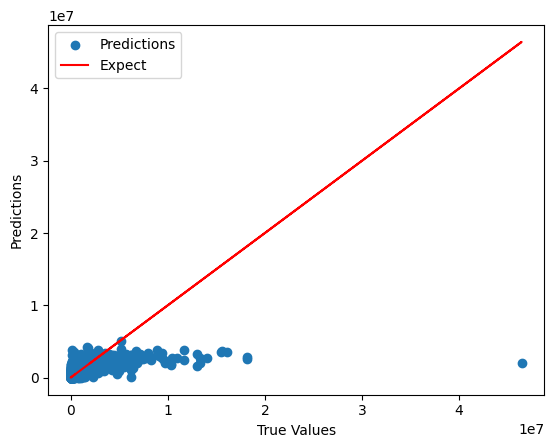

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(y_test_original, predictions_originalWage)
r2 = r2_score(y_test_original, predictions_originalWage)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize predictions vs true values
plt.scatter(y_test_original, predictions_originalWage, label="Predictions")
plt.plot(y_test_original, y_test_original, color='red', label="Expect")  # Line where x equals y
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()  # Display legend
plt.show()

